## Implementing vanilla Darkflow yolov2

Resource/Guide: https://www.youtube.com/watch?v=PyjBd7IDYZs

### Installation

In `cell_counter`, `git clone https://github.com/thtrieu/darkflow.git`  

Keep this workbook inside the `cell_counter/darkflow` directory

In `darkflow` run `python setup.py build_ext --inplace`



### Network weights

Download from: https://pjreddie.com/media/files/yolov2.weights (608x608 yolov2). 

Rename to 'yolo.weights'

Make a new directory (and move the weights there): `cell_counter/darkflow/bin/yolo.weights`

### Sample video

Place a sample video calle 'sample.avi' in the `cell_counter/darkflow` directory, and from there run: 

`flow --model cfg/yolo.cfg --load bin/yolo.weights --demo sample.avi --saveVideo`


In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

# display images as vectorised (SVG) instead of rasterised images
%config InlineBackend.figure_format = 'svg'

/Users/ba/.local/share/virtualenvs/cell_counter-Omr2iE0U/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.4,  # the boxes will only appear when >30% confidence
    'gpu': 1.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.6846110820770264s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep! 

In [3]:
# sample image: https://upload.wikimedia.org/wikipedia/commons/b/b3/Hodgkin_lymphoma_%281%29_mixed_cellulary_type.jpg
img = cv2.imread('../media/wren.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = tfnet.return_predict(img)


# call the function
result

# get image shape
#img.shape

[{'label': 'bird',
  'confidence': 0.79403025,
  'topleft': {'x': 683, 'y': 418},
  'bottomright': {'x': 1523, 'y': 1526}}]

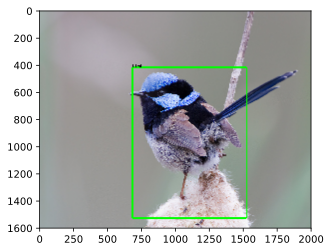

In [4]:
for thing in range(len(result)):
    tl = (result[thing]['topleft']['x'],result[thing]['topleft']['y'])
    br = (result[thing]['bottomright']['x'],result[thing]['bottomright']['y'])
    label = result[thing]['label']

    img = cv2.rectangle(img,tl,br,(0,255,0),7)
    img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
plt.imshow(img)
plt.show()